In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [49]:
def kernel(x, x_prime, theta_1=1, theta_2=0.4, theta_3=0.1):
    if x == x_prime:
      delta = 1
    elif x != x_prime:
      delta = 0
    return theta_1 * np.exp(- (x-x_prime)**2 / theta_2) + theta_3 * delta

def GP_regression(x_train, y_train, x_test):
    N = len(x_train)
    M = len(x_test)
    K = np.zeros((N,N))
    k = np.zeros(N)
    mu = np.zeros(M)
    var = np.zeros(M)

    for i in range(N):
      for j in range(N):
          K[i][j] = kernel(x_train[i],x_train[j])
    K_inv = np.linalg.inv(K)
    yy = np.dot(K_inv, y_train)

    for i in range(M):
      for j in range(N):
        k[j] = kernel(x_train[j], x_test[i])
      s = kernel(x_test[i],x_test[i])
      mu[i] = np.dot(k.T,yy)
      var[i] = s - np.dot(np.dot(k.T, K_inv), k)
      
    return mu, var


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


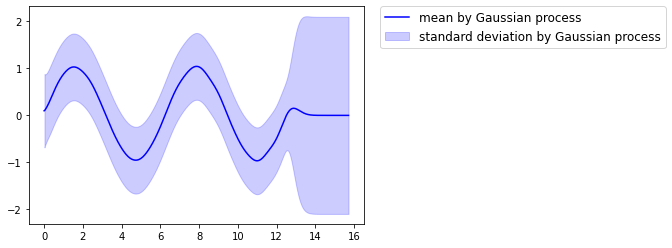

In [50]:
# ガウス過程回帰ができているか実験

x = np.linspace(0,5*np.pi, 1000)
x_train = np.linspace(0, 4*np.pi, 100)
y_train = np.sin(x_train) + np.random.rand(100) * 0.1
mu, var = GP_regression(x_train, y_train, x)


std = np.sqrt(var)
plt.plot(x, mu, color='blue', label='mean by Gaussian process')
plt.fill_between(x, mu + 2*std, mu - 2*std, alpha=.2, color='blue', label= 'standard deviation by Gaussian process')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

# 平均値±(標準偏差×2) … 95.4%の確率で範囲内に指定の数値が現れる

In [65]:
def make_graph_of_GP_regression(x,mu,var,x_train, y_train, index):
  plt.clf()
  std = np.sqrt(var)
  plt.plot(x, mu, color='blue', label='mean by Gaussian process')
  plt.plot(x_train, y_train, "x")
  plt.fill_between(x, mu + 2*std, mu - 2*std, alpha=.2, color='blue', label= 'standard deviation by Gaussian process')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
  plt.savefig("check{}.png".format(index))

In [74]:
def build_acquisition_function(mu, var, beta=100):
  a = mu + np.sqrt(np.log(beta) / beta) * var
  return a

def optimize_acquisition_function(a):
  max_index = []
  for i, x in enumerate(a):
    if x == max(a):
      max_index.append(i)
  return max_index

In [78]:
def Bayesian_optimization(x_train, y_train, N=10):
  n = 1000
  x = np.linspace(0,4*np.pi, n)
  for i in range(N):
    print("現在 {}回目の実験です。".format(i))
    mu, var = GP_regression(x_train, y_train, x)
    if i % 20 == 0:
      make_graph_of_GP_regression(x,mu,var,x_train, y_train, i)
    a = build_acquisition_function(mu, var)
   
    max_index = optimize_acquisition_function(a)
    # print(max_index)   
    # x_next = np.argmax(a)とすると、x_nextがx_train内にある点になる可能性がある。x_train内にある点になると、Kの逆行列が求められず、エラーを吐く。
    # x_next = x[np.argmax(a)]
    for j in range(len(max_index)):
      if x[max_index[j]] in x_train:
        print("argmaxの出力が観測点集合内の要素になっています")
        print("max_indexの要素は", len(max_index))
        if j != len(max_index)-1:
          print("continueします")
          continue
        elif j == len(max_index)-1:
          print("argmaxの出力で観測できるものがありませんでした")
          for k in range(n):
            x_next = x[random.randint(0, n-1)]
            if x_next not in x_train:
              break

      elif x[max_index[j]] not in x_train:
        x_next = x[max_index[j]]
        break
    print(x_next)
    y = np.sin(x_next) + np.random.rand() * 0.01
    print("x_next is here", x_next)
    print("y is here", y)
    x_train = np.append(x_train, x_next)
    y_train = np.append(y_train, y)
  return x_train, y_train

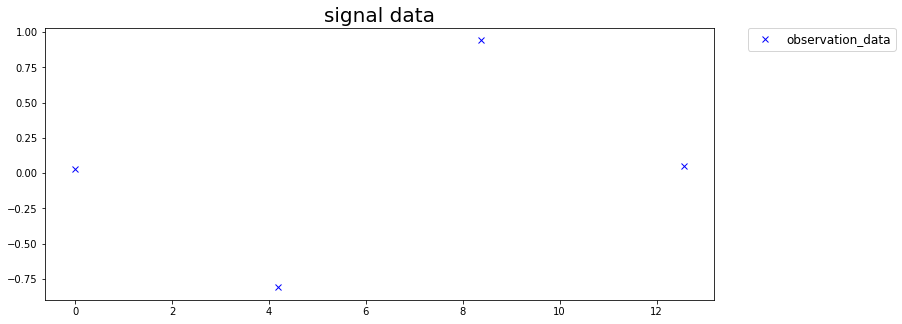

In [79]:
import numpy as np
import random
n = 4

x_train = np.linspace(0, 4*np.pi, n)
y_train = np.sin(x_train) + np.random.rand(n) * 0.1


from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5))
plt.title('signal data', fontsize=20)

# 元の信号
plt.plot(x_train, y_train, 'x', color='blue', label='observation_data')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

現在 0回目の実験です。
argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
5.4466851611787
x_next is here 5.4466851611787
y is here -0.738313693456017
現在 1回目の実験です。
argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
11.534896750117477
x_next is here 11.534896750117477
y is here -0.857545550828043
現在 2回目の実験です。
argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
9.258106879047398
x_next is here 9.258106879047398
y is here 0.17172509944930733
現在 3回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
11.899686287471248
x_next is here 11.899686287471248
y is here -0.6127136459857132
現在 4回目の実験です。
argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
5.886948395916009
x_next is here 5.886948395916009
y is here -0.38024063151988513
現在 5回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.9561061281856995
x_next is here 4.9561061281856995
y is here -0.967963701220295
現在 6回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.767474865390625
x_next is here 6.767474865390625
y is here 0.4684224177909391
現在 7回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
8.478212006084165
x_next is here 8.478212006084165
y is here 0.8140265884210411
現在 8回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
8.45305410695632
x_next is here 8.45305410695632
y is here 0.8275093717792243
現在 9回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
2.427737265837157
x_next is here 2.427737265837157
y is here 0.6633390452794545
現在 10回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
8.830422593874012
x_next is here 8.830422593874012
y is here 0.5691231628900576
現在 11回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
2.226474072814388
x_next is here 2.226474072814388
y is here 0.7933968478435673
現在 12回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.71710608647116
x_next is here 4.71710608647116
y is here -0.9986353758562863
現在 13回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
0.6792632764518471
x_next is here 0.6792632764518471
y is here 0.6379348600539451
現在 14回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
3.471790079642774
x_next is here 3.471790079642774
y is here -0.3175052010312498
現在 15回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
12.352528471772478
x_next is here 12.352528471772478
y is here -0.20283696823895128
現在 16回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.364895498681314
x_next is here 4.364895498681314
y is here -0.9329161716419886
現在 17回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.4278432271647015
x_next is here 6.4278432271647015
y is here 0.14839060119859795
現在 18回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
10.327317591980862
x_next is here 10.327317591980862
y is here -0.7781586135257034
現在 19回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
5.220264069028084
x_next is here 5.220264069028084
y is here -0.8673218835596049
現在 20回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.8868424345884642
x_next is here 1.8868424345884642
y is here 0.9525761280528616
現在 21回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
9.170054232099936
x_next is here 9.170054232099936
y is here 0.2557265595312229
現在 22回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.855474531674314
x_next is here 4.855474531674314
y is here -0.9853339988810753
現在 23回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
7.484474990534241
x_next is here 7.484474990534241
y is here 0.9377153363675793
現在 24回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9247382252715495
x_next is here 7.9247382252715495
y is here 1.0026908353840465
現在 25回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9373171748354725
x_next is here 7.9373171748354725
y is here 1.0040217411358185
現在 26回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9121592757076264
x_next is here 7.9121592757076264
y is here 1.0004578374811495
現在 27回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9498961243993955
x_next is here 7.9498961243993955
y is here 0.9960681758956592
現在 28回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.899580326143703
x_next is here 7.899580326143703
y is here 1.0022502376544498
現在 29回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9624750739633186
x_next is here 7.9624750739633186
y is here 0.9976175392806653
現在 30回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.88700137657978
x_next is here 7.88700137657978
y is here 1.009165738132127
現在 31回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.874422427015857
x_next is here 7.874422427015857
y is here 0.9998955592870713
現在 32回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9750540235272425
x_next is here 7.9750540235272425
y is here 0.9972358149405705
現在 33回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.861843477451934
x_next is here 7.861843477451934
y is here 1.0079745278058607
現在 34回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.849264527888011
x_next is here 7.849264527888011
y is here 1.0090498644638624
現在 35回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.836685578324088
x_next is here 7.836685578324088
y is here 1.0072441023920449
現在 36回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.9876329730911655
x_next is here 7.9876329730911655
y is here 0.9927558732836327
現在 37回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.824106628760165
x_next is here 7.824106628760165
y is here 1.0083276258310936
現在 38回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.811527679196242
x_next is here 7.811527679196242
y is here 1.0002374923417408
現在 39回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.798948729632318
x_next is here 7.798948729632318
y is here 1.005677490711203
現在 40回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


8.000211922655089
x_next is here 8.000211922655089
y is here 0.9978269337649148
現在 41回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.786369780068395
x_next is here 7.786369780068395
y is here 1.006116172551029
現在 42回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.773790830504472
x_next is here 7.773790830504472
y is here 1.0020659647752166
現在 43回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


8.01279087221901
x_next is here 8.01279087221901
y is here 0.9920461883117402
現在 44回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.761211880940549
x_next is here 7.761211880940549
y is here 0.9977512830521442
現在 45回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.748632931376626
x_next is here 7.748632931376626
y is here 0.9989317312128103
現在 46回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


8.025369821782935
x_next is here 8.025369821782935
y is here 0.986912661852907
現在 47回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.736053981812703
x_next is here 7.736053981812703
y is here 0.9983752323009154
現在 48回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.72347503224878
x_next is here 7.72347503224878
y is here 0.9957843679931521
現在 49回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


8.037948771346857
x_next is here 8.037948771346857
y is here 0.9842932688405192
現在 50回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.710896082684857
x_next is here 7.710896082684857
y is here 0.999592926938725
現在 51回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.698317133120934
x_next is here 7.698317133120934
y is here 0.9924714522579516
現在 52回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.742263985599006
x_next is here 4.742263985599006
y is here -0.9967280742171838
現在 53回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.5723686954903868
x_next is here 1.5723686954903868
y is here 1.0019855283828107
現在 54回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
12.27705477438894
x_next is here 12.27705477438894
y is here -0.27797388246629073
現在 55回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.8742634850245412
x_next is here 1.8742634850245412
y is here 0.963401830280169
現在 56回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.151106336758393
x_next is here 6.151106336758393
y is here -0.1276627503403229
現在 57回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
2.629000458859927
x_next is here 2.629000458859927
y is here 0.49939591473328115
現在 58回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.0817896624973862
x_next is here 1.0817896624973862
y is here 0.8904534000831082
現在 59回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
2.7170531058073886
x_next is here 2.7170531058073886
y is here 0.41419465060871313
現在 60回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
12.100949480494018
x_next is here 12.100949480494018
y is here -0.4408864941897237
現在 61回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.276842851733853
x_next is here 4.276842851733853
y is here -0.906399720415035
現在 62回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.616474489959776
x_next is here 4.616474489959776
y is here -0.9919367191002013
現在 63回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.55357974214016
x_next is here 4.55357974214016
y is here -0.9831714872937133
現在 64回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
2.905737349266235
x_next is here 2.905737349266235
y is here 0.24087143435715072
現在 65回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.7987897876410026
x_next is here 1.7987897876410026
y is here 0.9792523017045648
現在 66回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.276895832397624
x_next is here 6.276895832397624
y is here -0.002796322951844483
現在 67回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
8.604001501723397
x_next is here 8.604001501723397
y is here 0.7403527645753515
現在 68回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
4.767421884726853
x_next is here 4.767421884726853
y is here -0.9980463867936418
現在 69回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
10.767580826718168
x_next is here 10.767580826718168
y is here -0.9668513509663585
現在 70回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
5.459264110742623
x_next is here 5.459264110742623
y is here -0.7335692818578958
現在 71回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
1.6226844937460791
x_next is here 1.6226844937460791
y is here 1.0027297535318922
現在 72回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6101055441821561
x_next is here 1.6101055441821561
y is here 0.9993601557267913
現在 73回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.597526594618233
x_next is here 1.597526594618233
y is here 1.007163584020306
現在 74回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5849476450543099
x_next is here 1.5849476450543099
y is here 1.0095676910770157
現在 75回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6352634433100024
x_next is here 1.6352634433100024
y is here 1.0031860325280384
現在 76回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5597897459264638
x_next is here 1.5597897459264638
y is here 1.0018407360376418
現在 77回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6478423928739254
x_next is here 1.6478423928739254
y is here 1.000094895817967
現在 78回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5472107963625406
x_next is here 1.5472107963625406
y is here 1.0018008953222597
現在 79回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6604213424378484
x_next is here 1.6604213424378484
y is here 0.9997024722475134
現在 80回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5346318467986175
x_next is here 1.5346318467986175
y is here 1.0061423998622565
現在 81回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5220528972346945
x_next is here 1.5220528972346945
y is here 1.001475300426632
現在 82回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6730002920017717
x_next is here 1.6730002920017717
y is here 0.997140517653122
現在 83回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.5094739476707715
x_next is here 1.5094739476707715
y is here 0.9993789229439782
現在 84回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6855792415656947
x_next is here 1.6855792415656947
y is here 0.9951524089752586
現在 85回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.4968949981068482
x_next is here 1.4968949981068482
y is here 1.0063723766336063
現在 86回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.4843160485429252
x_next is here 1.4843160485429252
y is here 1.0042018466837936
現在 87回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.4717370989790022
x_next is here 1.4717370989790022
y is here 1.0001788858267517
現在 88回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.6981581911296177
x_next is here 1.6981581911296177
y is here 1.0003340305930197
現在 89回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.459158149415079
x_next is here 1.459158149415079
y is here 1.0000510537539529
現在 90回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.7107371406935408
x_next is here 1.7107371406935408
y is here 0.9909839385250538
現在 91回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.446579199851156
x_next is here 1.446579199851156
y is here 0.9961773658587746
現在 92回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.723316090257464
x_next is here 1.723316090257464
y is here 0.991145501340526
現在 93回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.4340002502872329
x_next is here 1.4340002502872329
y is here 0.997997456868011
現在 94回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.4214213007233096
x_next is here 1.4214213007233096
y is here 0.9899747785258917
現在 95回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


1.735895039821387
x_next is here 1.735895039821387
y is here 0.9939377423806866
現在 96回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
7.534790788789934
x_next is here 7.534790788789934
y is here 0.9583073173637178
現在 97回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


7.685738183557011
x_next is here 7.685738183557011
y is here 0.9890858783201353
現在 98回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.817790663646317
x_next is here 6.817790663646317
y is here 0.5177988849268947
現在 99回目の実験です。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


argmaxの出力が観測点集合内の要素になっています
max_indexの要素は 1
argmaxの出力で観測できるものがありませんでした
6.956159108849471
x_next is here 6.956159108849471
y is here 0.6330894668310378


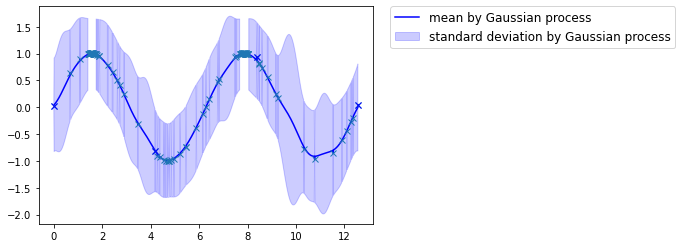

In [80]:
D_x, D_y = Bayesian_optimization(x_train, y_train, N=100)
plt.plot(x_train, y_train, 'x', color='blue', label='correct signal')
plt.show()